<a href="https://colab.research.google.com/github/imcuky/Knapsack/blob/main/KNAPSACK_PROBLEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**EMPIRICAL STUDY OF KNAPSACK PROBLEM**

# **2. Knapsack Problem**

The Knapsack Problem is a problem in combinatorial optimization. Given a set of items, each with a weight and a value, the goal is to determine which items to include in a collection so that the total weight is less than or equal to a given capacity and the total value is as large as possible.

In this assignment, we will implement the 0-1 Knapsack Problem, which restricts each item pick (1) or not pick (0).

We would like to test four different algorithms: generate and test (brute force), greedy, simulated annealing and genetic algorithm to find which one provides the best tradeoffs, namely in the algorithm's runtime and the accuracy of its solution. The solution we are referring to refers to the best combination of items that will maximize the price without exceeding its specified max capacity/weight.


# **3. Dataset**


The dataset that will be use for Knapsack Problem was retrieved from Kaggle created by Chirag Chauhan, you can find it <a href = "https://www.kaggle.com/datasets/warcoder/knapsack-problem?resource=download">here<a>.

Dataset Name: **knapsack_5_items.csv**

**Contents:**

- `Weights`: This column provide the weights of the items, representing how heavy each item is.

- `Prices`: This column provide the values associated with each item. These values represent the profit that you gain by including each item in the knapsack.

- `Capacity`: This column provide the capacity (maximum weight) that the knapsack can hold.

- `Best Picks`: This column provide the best combination of items that should be selected to maximize the value within the given capacity.

- `Best Prices`: This column provide the expected optimal solution of the maximum profit.

**Import important libraries**

In [ ]:
import pandas as pd
import itertools
import numpy as np
# import the matplot library for displaying the
# change in paramarter on accuracy
import matplotlib.pyplot as plt

**Read Dataset**


In [ ]:
url = "https://raw.githubusercontent.com/imcuky/Knapsack/main/knapsack_5_items.csv"

dataset = pd.read_csv(url)

Let's see what are the columns of the dataset? :

In [ ]:
dataset.columns

Index(['Weights', 'Prices', 'Capacity', 'Best picks', 'Best price'], dtype='object')

As we expected, we have columns for weights, costs, capacity, best picks and best price for all the instances.

Now let's see the first 10 entries (rows):

In [ ]:
dataset.head(10)

,Weights,Prices,Capacity,Best picks,Best price
0,[46 40 42 38 10],[12 19 19 15 8],40,[0. 1. 0. 0. 0.],19.0
1,[11 31 4 6 7],[ 2 8 18 16 3],64,[1. 1. 1. 1. 1.],47.0
2,[32 49 27 37 24],[19 16 16 4 1],87,[1. 0. 1. 0. 1.],36.0
3,[20 35 22 23 16],[19 17 19 9 1],21,[1. 0. 0. 0. 0.],19.0
4,[ 7 12 19 13 20],[10 11 18 15 5],50,[0. 1. 1. 1. 0.],44.0
5,[27 10 25 25 7],[13 19 7 16 3],66,[1. 1. 0. 1. 0.],48.0
6,[21 2 33 45 26],[ 1 14 10 6 13],80,[0. 1. 1. 0. 1.],37.0
7,[37 27 39 14 25],[18 7 15 4 13],35,[0. 0. 0. 0. 1.],13.0
8,[ 1 48 4 23 39],[ 9 4 10 16 12],51,[1. 0. 1. 1. 0.],35.0
9,[ 4 3 22 9 32],[14 6 3 17 8],53,[1. 1. 0. 1. 1.],45.0


**Preprocessing Step**

Typically, the initial step in any project that involves reading and handling data is data preprocessing and cleansing.

In our dataset, we expect the entries in the "Weights," "Prices," and "Best Picks" columns to be in the form of arrays of floats or integers, like this: [45, 40, 42, 38, 10]

However, when you read each entry using pandas, they will be in a form of a string: "[45 40 42 38 10]"

So we need to convert these strings into "arrays of floats or integers.


In [ ]:
def string_to_list(string):

  string_list = string.strip('[]').split()

  float_list = [float(element) for element in string_list]

  return float_list

Furthermore, it's possible that certain rows in the dataset contain empty values in specific columns. We also aim to eliminate these rows as they do not provide any useful information. We use dropna() function to do so:

In [ ]:
#Ignore the warning messages.

# drop all null data set
dataset = dataset.dropna()

dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))
dataset['Best picks'] = dataset['Best picks'].apply(lambda x : string_to_list(x))

# **4. Generate and Test**




Generate and Test is brute force algorithm that generates all possible solutions in the knapsack, and keeps track of the solution with the highest total price and has the following constraint: does not contain a weight that exceeds our max knapsack capacity.

To solve the knapsack problem, we will generate all possible solutions by considering various combinations of items. In this particular knapsack instance, there are a total of 32 solutions (as there are $2^{5} = 32$ possible combinations). Subsequently, we will evaluate each of these solutions to determine the best one.


In [ ]:
def gen_and_test(data):
  '''

    This function generates all the possible solution for the knapsack and tests each one.

    Input:
      data - contains the infomation about the weights, costs, capacity of the knapsack problem

    Returns:
      best_solution_price - The best solution price of the knapsack problem
      best_solution - The best solution of the knapsack problem

  '''

  # use to keep track of the best solution
  best_solution = None
  best_solution_price = 0

  #bag info
  max_wt = data['Capacity']

  #items info
  items_wts = data['Weights']
  items_prices = data['Prices']
  num_items = len(items_prices)


  # for a solution of this knapsack, each item can be included (1) or not included (0)
  # There's total of 5 items in this problem. Therefore, this will generate a maximum of 2^5(32)
  # possibilities solutions for this knapsack
  # each solution will be in range of (0,0,0,0,0) to (1,1,1,1,1)
  sol_list = list(itertools.product(*[[0,1]]*num_items))


  # we will use Brute Force to go through each possible solution
  for _ in range(len(sol_list)):

    #select the first solution from list
    current_sol = sol_list.pop(0)

    current_prices = 0
    current_weights = 0

    #loop throught the current result
    for i in range(len(current_sol)):

      #calculate the prices and the weights of the current solution
      if current_sol[i] == 1:
        current_prices += items_prices[i]
        current_weights += items_wts[i]

    # The test section
    # if the current solution gives us a better price and it doesn't exceed the capacity
    # then it will be our best solution so far
    if current_weights <= max_wt and current_prices > best_solution_price:
            best_solution = current_sol
            best_solution_price = current_prices

  #after iterating all the possible solution
  # we can guarantee that we find the best solution amount the all
  return best_solution_price, best_solution



In [ ]:
solutions = []
#go throught each row in the dataset
#each row repersents a knapsack problem
for _, row in dataset.iterrows():
    # the best solution for the current knapsack
    target = row['Best price']

    # input the current knapsack row into the gen_and_test algo
    # then get the solution from the gen_and_test algo
    solution, indexes = gen_and_test(row)

    # if the solution generate by the gen_and_test algo matches
    # the best solution append 1 into the list
    solutions.append(1 if target == solution else 0)




In [ ]:
# Accuracy
print('Accuracy of best prices found is', np.mean(solutions))

Accuracy of best prices found is 1.0


**RESULTS / ANALYSIS**
---
This algorithm takes one individual knapsack object called "data". It first generates all possible permutations of 0s and 1s inside each knapsack and then runs a loop to increment both the price of the individual item inside the knapsack and it's corresponding weight when the permutation being tested is set to a string of '1'. From there, it updates the best solution (the correct knapsack permutation) and the best solution price (the best possible achievable total price), given that the weight does not surpass the total capacity (total weight) of the knapsack and that the total price of the current permutation exceeds that of the previous permutation.

Upon testing the algorithm, it does indeed generate the correct output. However, the runtime of the algorithm is not-polynomial (exponential) because it is finding the permutation of all possible solutions based on the number of items contained in the knapsack. We would like to find alternative methods for which we can generate a solution with nearly as much accuracy, but run in non-exponential time.




------------------------------------------------------------------------------------------------

# **5. Greedy Search**



The Greedy Search is a deterministic polynomial runtime algorithm that chooses items to first select into the knapsack in order of highest price divided by weight ratio until the remaining capacity cannot contain the next proceeding item, or if all the items are already included in the knapsack.

The algorithm works by taking an individual knapsack object, and then running a for loop for which the price divided by weight of each knapsack item and its respective index value is appended to a list as a tuple. The list is then sorted in order of greatest to least, such that the knapsack item containing the highest price to weight will always be selected earlier than items with a lower ratio. By using the index to track the items with the highest ratio, we modify the best solution value and increment the weight of the items in order of highest ratio provided that the current weight does not exceed the capacity of the knapsack.


In [ ]:
def greedy(data):
  '''
    Apply a greedy search approach to solve the knapsack problem.
    The items are selected greedily based on their value-to-weight ratio.

    Input:
      data - contains the infomation about the weights, costs, capacity of the knapsack problem

    Returns:
      best_solution_price - The best solution price of the current knapsack
      best_solution - The best solution of the current knapsack
  '''

  # use to keep track of the best solution
  best_solution = ['0','0','0','0','0']
  best_solution_price = 0

  #box info
  max_wt = data['Capacity']

  #items info
  items_wts = data['Weights']
  items_prices = data['Prices']
  num_items = len(items_prices)

  # The strategy of the greedy algo:
  # Pick the item with the highest 'value-to-weight' ratio

  value_per_weight = []

  for i in range (num_items):
    # need to store the index since we will stort the list base on ratio from hight to low
    value_per_weight.append( (items_prices[i]/items_wts[i], i) )

  # We will sort the list in decreasing order in order to visit the
  # items with the best 'value_per_weight' first
  value_per_weight.sort(reverse=True)


  for _, index in value_per_weight:

    # keep picking the highest value-to-weight item until exceed the capacity
    if items_wts[index] <= max_wt:

      best_solution[index] = '1'
      best_solution_price += items_prices[index]
      max_wt -= items_wts[index]


  return best_solution_price, best_solution


---------------------------------------

In [ ]:
solutions_greedy = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = greedy(row)
    solutions_greedy.append(1 if target == solution else 0)


In [ ]:
print("Greedy Accuracy is", np.mean(solutions_greedy))

Greedy Accuracy is 0.8342949691264298




---



**RESULTS / ANALYSIS**
---

The greedy algorithm does not always result in the best solution because choosing values by their greedy solution may result in being unable to take a separate combination of multiple items, for which their combined price may exceed that of simply taking the item with the best ratio.

Suppose we have a knapsack where each item has a capacity of 12 and items with the following prices and weights respectively: {100, 50, 60}, {8, 6, 6}. We see that the respective ratio of price to weights is: 10/8, 50/6 and 60/6, so we take the first item and include it into the knapsack using the greedy algorithm. However, we realize that the combination of taking the second and third items results in a greater price of 50 + 60 = 110 by not following the greedy algorithm. Because the greedy algorithm does not account for the capacity limitations, it will not always generate the optimal knapsack with the highest price.


------------------------------------------------------------------------------------------------

# **6. Simulated Annealing**




The Simulated Annealing algorithm is a non-deterministic polynomial runtime algorithm that finds neighbouring solutions and compares it to an initial, random solution until the initial temperature reaches the minimum temperature specified. The runtime and accuracy is determined by primarily the cooling rate, or the rate at which the temperature decreases for every following iteration.

In the simulated annealing, the algorithm begins by taking a random knapsack solution and continues iterations while the current temperature exceeds the minimum temperature. This implies that solutions for which a higher starting temperature inputted will result in higher accuracy but longer runtimes (due to the greater number of iterations needed to reduce it).

During the iterations, a new solution is randomly calculated and its prices are compared to the current best solution. The accept function is used to check and update the solution when it is better than the old one, and the temperature is reduced by the cooling rate at the end of each iteration. This implies that a higher cooling rate will result in higher accuracy but longer runtimes, as it would take longer for the cooling rate to reduce the temperature below the minimum necessary to exit out the loop. Once the loop ends, the current best solution and its total price is then returned.


In [ ]:

import random
import math

def rand_move(sol):
  '''
  Generate a new solution (neighbour solution) by picking/droping randomly item.

  Input:
    sol - the current solution.

  Returns:
    new_sol - the neighbour solution of the current solution.

  '''
  new_sol = sol
  #random pick an index to modify
  i = random.randint(0,len(new_sol)-1)
  #drop if it's picked, and pick it if it's not
  new_sol[i] = 1 if new_sol[i] == 0 else 0

  return new_sol


def calculate_fitness(items_wts, items_prices , sol, max_wt):
  '''
  The fitness function that use to calculate the fitness of the current solution.

  Inputs:
    items_wts - An array that contains the weight of each items.
    items_prices - An array that contains the price of each items.
    sol - the solution that need to calculate the fitness.
    max_wt - the bag's capacity.

  Returns:
    p - the current prices of the solution.

  '''
  p = 0
  w = 0

  for i in range(len(sol)):
    if sol[i] == 1:
      p += items_prices[i]
      w += items_wts[i]

  # if the size exceeds the bag capacity
  # it's fitness is set to 0 indicate this solution is not reachable
  if w > max_wt:
    p = 0

  return p



def accept(difference, t):
  '''

    The accept function. This function applies the algo on page 25 of lecture 'PopulationBased.'
    If the new solution have a higher prices than the current, it is always accepted;
    otherwise, it is accepted with a probability that increases as the difference increases and as the temperature decreases.

    Inputs:
      difference - The difference between the price of the new generated solution and the current solution
      t - The current temperature
    Returns:
      Boolean value that indicates if the new solution is accepted or rejected
  '''
  #if candidate is better than curr solution then accept
  #this happend when the differece is greater than 0
  if difference > 0:
    return True

  #if not, then there's still a probability that we accect this solution
  else:

    r = random.random()
    # accept with a acception probability
    # the acception probability is calculated by using the e^(difference/t)
    if r < math.exp((difference/t)):
      return True
    else:
      return False


def simulated_annealing(data, N, initial_temperature, cooling_rate):

  '''
    Solve the knapsack problem using simulated annealing by using the algo on page 24 of lecture 'PopulationBased.'

    The algorithm starts with a random solution, then generates a neighbor solution by slightly modifying the current solution.
    If the neighbor solution is better (has a higher price), it becomes the new current solution.
    If the neighbor solution is worse, it may still become the new current solution with a certain probability,
    which depends on the difference of the neighbor with the current and the current temperature.
    The temperature is gradually decreased according to the cooling rate.

    Inputs:
      data - contains the infomation about the weights, costs, capacity of the knapsack problem
      N - The number of time we repeat this algo. Since we are using the temperature and cooling rate as an iteration factor,
          this variable is not considered.
      initial_temperature - The initial temperature of the simulation.
      cooling_rate - The percentage of the temperature will be reduce.

    Returns:
      best_solution_price - The best solution price of the current knapsack
      best_solution - The best solution of the current knapsack
  '''

  #set the Tmax and Tmin
  temp = initial_temperature
  t_min = 0.01

  #bag info
  max_wt = data['Capacity']

  #items info
  items_wts = data['Weights']
  items_prices = data['Prices']
  num_items = len(items_prices)

  # create a random initial permutation
  best_solution = [random.randint(0, 1) for _ in range(num_items)]
  best_solution_price = calculate_fitness(items_wts, items_prices, best_solution, max_wt)


  while temp > t_min:

    #generate a neighbour solution and calculating its fitness
    new_sol = rand_move(best_solution)
    new_price = calculate_fitness(items_wts, items_prices, new_sol, max_wt)

    #calculate the difference
    difference = new_price - best_solution_price

    # decide to accept this solution or not
    if accept(difference, temp):
      best_solution = new_sol
      best_solution_price = new_price

    #reduces the temperature by the cooling rate
    temp *= cooling_rate

  return best_solution_price, best_solution


---

In [ ]:
solutions_sa = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, N = 10, initial_temperature=1, cooling_rate=0.95)
    solutions_sa.append(1 if target == solution else 0)


In [ ]:
print("Simulated Annealing Accuracy is", np.mean(solutions_sa))

Simulated Annealing Accuracy is 0.9143638020042515



---

**Explore changing other parameters**

> Increase the initial temperature (initial temperature = 30)

In [ ]:
solutions_sa = []
for _, row in dataset.iterrows():
    target = row['Best price']
    #increace the initial_temperature
    solution, indexes = simulated_annealing(row, N = 10, initial_temperature=30, cooling_rate=0.95)
    solutions_sa.append(1 if target == solution else 0)


In [ ]:
print("Simulated Annealing Accuracy is", np.mean(solutions_sa))

Simulated Annealing Accuracy is 0.9590039477679927


> Increase the cooling rate (cooling rate = 0.99)

In [ ]:
solutions_sa = []
for _, row in dataset.iterrows():
    target = row['Best price']
    #increace the initial_temperature
    solution, indexes = simulated_annealing(row, N = 10, initial_temperature=1, cooling_rate=0.99)
    solutions_sa.append(1 if target == solution else 0)

In [ ]:
print("Simulated Annealing Accuracy is", np.mean(solutions_sa))

Simulated Annealing Accuracy is 1.0


> Increase both the initial temperature and the cooling rate (initial temperature = 30, cooling rate = 0.99)

In [ ]:
solutions_sa = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, N = 10, initial_temperature=30, cooling_rate=0.99)
    solutions_sa.append(1 if target == solution else 0)


In [ ]:
print("Simulated Annealing Accuracy is", np.mean(solutions_sa))

Simulated Annealing Accuracy is 1.0


> Increase the initial temperature more but decrease the cooling rate(initial temperature = 50, cooling rate = 0.85)

In [ ]:
solutions_sa = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, N = 10, initial_temperature=50, cooling_rate=0.85)
    solutions_sa.append(1 if target == solution else 0)


In [ ]:
print("Simulated Annealing Accuracy is", np.mean(solutions_sa))

Simulated Annealing Accuracy is 0.6884300030367446


---
Defind the overall comparison graph
---


`simulated_annealing(row, N = 10, initial_temperature=1, cooling_rate=0.95)`

Use `initial_temperature=1, cooling_rate=0.95` as the default parameters find the change on one parameter affect the overall accuracy.

The comparition graph will be used in the Comparative Study section

In [ ]:
def change_in_cooling(replacement_cooling_rate):
  '''
  Calculate accuracy for the given cooling rate
  '''
  solutions_sa = []
  for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, N = 10, initial_temperature=1, cooling_rate=replacement_cooling_rate)
    solutions_sa.append(1 if target == solution else 0)

  return np.mean(solutions_sa)

def show_change_in_cooling():

  '''
    Display the comparition graph of the change in cooling rate affect the
    Simulated Annealing Accuracy
  '''
  # Define a range of cooling rate (0.5 to 0.99)
  # and select 20 samples in the range
  x = np.linspace(0.5, 0.99, 20)
  y = []

  # calculate the result for each cooling_rate
  for cooling_rate in x:
    y.append(change_in_cooling(cooling_rate))

  # Plot the data
  plt.plot(x, y, 'b-')
  # Add labels and title to the plot
  plt.xlabel("Cooling Rate")
  plt.ylabel("Accuracy")
  plt.title('Plot of the Cooling Rate vs. Accuracy')
  plt.show()

def change_in_temp(replacement_temp):

  '''
  Calculate accuracy for the given temperature
  '''
  solutions_sa = []
  for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, N = 10, initial_temperature=replacement_temp, cooling_rate=0.95)
    solutions_sa.append(1 if target == solution else 0)

  return np.mean(solutions_sa)

def show_change_in_temp():
  '''
    Display the comparition graph of the change in temperature affect the
    Simulated Annealing Accuracy
  '''
  # Define a range of temperature values (100 to 1000)
  # and select 20 samples in the range
  x = np.linspace(100, 1000, 20)
  y = []

  # calculate the result for each temperature
  for temp in x:
      accuracy = change_in_temp(temp)
      y.append(accuracy)

  # Plot the data
  plt.plot(x, y, 'b-')

  # Add labels and title to the plot
  plt.xlabel("Temperature")
  plt.ylabel("Accuracy")
  plt.title('Plot of the Temperature vs. Accuracy')

  # Display the plot
  plt.show()

**RESULTS / ANALYSIS**
--


From our standard configuration, where temperature is initially set to 1 and cooling is set to 0.95, the simulated annealing accuracy yields approximately 91.5%.

From the results, increasing our initial temperature, appears to cause a higher accuracy but longer runtimes for reasons mentioned previously (greater number of iterations needed) increases the simulated annealing accuracy to 96.2%.

However, upon further analysis by plotting the temperature versus accuracy, there is no correlation to increasing the initial temperature. This is because of the accept function condition: r < $e^{diff/T}$. Even if we increase the number of iterations by taking a higher initial temperature, it will cause $e^{diff/T}$ to scale closer to 1 and make it less likely to accept neighour solutions, which means less opportunities to achieve a global max as opposed to local max. So, this causes it to offscale with the advantages gained from more iterations, and ultimately results in no-correlation to accuracy, whether we increase the initial temperature or not.

On the other hand, increasing the cooling rate does directly result in an increase in accuracy: in this case, to 100%. This applies to when the cooling and temperature because from our previous results as we understand that modifying temperature does not correlate to increasing accuracy. In this case, accuracy retains at 100%.

However, in the last example, we notice that a decreased cooling rate of 0.85 while the temperature has increased to 50 has significantly dropped the simulated annealing accuracy to 69%. As previously mentioned, a lower cooling rate will directly correlate to less iterations because we modify the temperature by multiplying it by the cooling rate at the end of each iteration. As such, accuracy will be lessened with less iterations and a lower cooling rate.

------------------------------------------------------------------------------------------------

# **7. Genetic Algorithm**



The Genetic algorithm is a non-deterministic polynomial runtime algorithm that picks the best solution for each generation and has a randomized chance of either crossing solutions and mutating them afterwards. The runtime and accuracy is determined by primarily the cross rate and the mutation rate.

In the genetic algorithm, a population, or set of knapsack solutions, is first generated based on the starting size inputted as the population: population_size. Then, we have two nested loops. The outer condition of the loop makes n iterations, whereas n represents the num_generations parameter that the function takes as an input. The inner while loop condition checks whether the number of populations generated is less than the population size of the function.

Within the while loop, two solutions with best fitness that are chosen from a random set of solutions is generated as per the tournament_selection helper function. These two solutions, par1 and par2, are used as parent solutions and as inputs for the crossover function, in order to produce two children solutions ch1 and ch2. These child solutions then either perform a mutation or don’t, and appended to the new_gen array at the end.

At the end, population is set to the new_gen, which contains all the children solutions that were appended.

The best solution and max price for it is computed from running get_best_fitness on the population that was generated by appending child solutions during the iteration.


In [ ]:
import random

def calculate_fitness(ind, prices, weights, capacity):

  '''
  The fitness function that use to calculate the fitness (price) of the current individual.

  Inputs:
    ind - the individual solution that need to calculate the fitness.
    prices - An array that contains the price of each items.
    weights - An array that contains the weight of each items.
    capacity - the bag's capacity.

  Returns:
    fitness - the current prices of the individual.

  '''
  fitness = 0
  w = 0

  #calculating the fitness by calculating both the prices and weights
  for i in range(len(ind)):
    if ind[i] == 1:
      fitness += prices[i]
      w += weights[i]

  # if the size exceeds the bag capacity
  # it's fitness is set to 0 indicate this solution is not reachable
  if w > capacity:
    fitness = 0

  return fitness


def crossover(parent1, parent2, cross_rate):

  '''
  Perform a crossover operation on two parent sequences for a certain cross rate.
  It takes two sequences (parent1 and parent2) as input and returns two new sequences (child1 and child2) as output.
  The new sequences are created by applying one-point crossover from the parent sequences at a randomly chosen crossover point.

  Inputs:
      parent1 - The first parent sequence.
      parent2 - The second parent sequence.
      cross_rate - The rate of the two parent will perform a crossover.
  Retruns:
      child1 - The first child sequence.
      child2 - The second child sequence.
  '''

  if random.random() < cross_rate:

    # generate a random cross point
    index = random.randint(0, len(parent1)-1)
    # generate the new sequences
    child1 = parent1[index:] + parent2[:index]
    child2 = parent2[index:] + parent1[:index]

    # if the 2 parent will not perform a crossover
    # We will return back the two parent
  else:
    child1 = parent1
    child2 = parent2

  return child1, child2


def mutation(child, mut_rate):
  '''
    Modify an element of an individual by a mutation rate.
    The new sequence is created by randomly changing one or none of elements of the input sequence.

    Inputs:
      child - The input sequence to be mutated.
      mut_rate - The rate of sequence flips at random positions.

    Retruns:
        child - The mutated sequence.

  '''

  if random.random() < mut_rate:
    # randomly modified the element
    # drop if it's picked, and pick it if it's not
    index = random.randint(0, len(child)-1)
    child[index] = 1 if child[index] == 0 else 0


  return child


def get_best_fitness(population, items_prices, items_wts, max_wt):

  '''
    Returns the individuals with best fitness among a population set.

    Inputs:

      population - The population of individuals.
      items_prices - An array that contains the price of each items.
      items_wts - An array that contains the weight of each items.
      max_wt - The bag's capacity.

    Returns:

      best_fitness - The best fitness among the population.
      best_individual - The best individual with the best fitness among the population.

  '''
  # calculate all the fitness for the individuals
  fitness_set = [calculate_fitness(population[i], items_prices, items_wts, max_wt) for i in range(len(population))]

  # find the index of the individuals with the best fitness
  index = fitness_set.index(max(fitness_set))

  #get the results
  best_fitness = fitness_set[index]
  best_individual = population[index]

  return best_fitness, best_individual


def tournament_selection(population, tournament_size, items_prices, items_wts, max_wt):

  '''
    Performs a tournament among a the individuals chosen at random from the population set
    and returns the one with the best fitness among those random.

    Inputs:
      population -  The population of individuals.
      tournament_size - The number of individuals participating in the tournament.
      items_prices - An array that contains the price of each items.
      items_wts - An array that contains the weight of each items.
      max_wt - the bag's capacity.

    Returns:
      winner - The winner of the tournament.

  '''
  # select random k individuals from the population
  tournament = [population[random.randint(0, len(population)-1)] for _ in range(tournament_size)]

  # find the winner among the tournament
  _, winner = get_best_fitness(tournament, items_prices, items_wts, max_wt)

  return winner


def genetic_algorithm(data, population_size, num_generations, mut_rate, cross_rate, tournament_size):

  '''
    Apply the genetic algorithm on a population of knapsack.
    It generates a population and evolves using Tournament-Based Selection, crossover and mutation to generating the next generation.
    The fittest individuals are selected for reproduction the next generation and replace the less fit individuals in the population.

    Inputs:
      data - contains the infomation about the weights, costs, capacity of the knapsack problem.
      population_size -
      num_generations - The number of generations to run the algorithm.
      mut_rate - The rate at which mutations occur.
      cross_rate - The rate at which crossover occur
      tournament_size - The number of individuals participating in the tournament.

    Returns:
      best_solution_price - The best solution price of the current knapsack.
      best_solution - The best solution of the current knapsack.
  '''

  best_solution = None
  best_solution_price = 0

  #box info
  max_wt = data['Capacity']

  #items info
  items_wts = data['Weights']
  items_prices = data['Prices']
  num_items = len(items_prices)

  # generate a total of population_size of individual
  population = []

  # this will be the first generation
  for _ in range(population_size):
    m = [random.randint(0, 1) for _ in range(num_items)]
    population.append(m)


  # produced the next generation
  for generation in range(num_generations-1):

    new_gen = []
    population_count = 0

    while population_count < population_size:

      # apply the Tournament-Based Selection to select the parents
      par1 = tournament_selection(population, tournament_size, items_prices, items_wts, max_wt)
      par2 = tournament_selection(population, tournament_size, items_prices, items_wts, max_wt)

      # Create the next generation through crossover
      ch1, ch2 = crossover(par1, par2, cross_rate)

      # Apply Mutate the child
      ch1 = mutation(ch1, mut_rate)
      ch2 = mutation(ch2, mut_rate)

      # Add the children to the next generation
      new_gen.append(ch1)
      new_gen.append(ch2)

      # increase the population count
      population_count += 2

    # replace the old generation with the new generation
    population = new_gen

  # find the best individual from the population
  best_solution_price, best_solution = get_best_fitness(population, items_prices, items_wts, max_wt)

  return best_solution_price, best_solution


---

In [ ]:
solutions_ga = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)


In [ ]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

Genetic Algorithm Accuracy is 0.9934203866788136


---
**Explore changing other parameters**

> Increase the cross rate (cross rate=0.9)

In [ ]:
solutions_ga = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.1, cross_rate = 0.9, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)

In [ ]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

Genetic Algorithm Accuracy is 0.9679117319566758


> Increase the mutation rate (mutation rate=0.3)

In [ ]:
solutions_ga = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.3, cross_rate = 0.7, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)

In [ ]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

Genetic Algorithm Accuracy is 0.9554610790565847


> Increase both the cross rate and mutation rate (cross rate=0.9 , mutation rate=0.3)

In [ ]:
solutions_ga = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.3, cross_rate = 0.9, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

Genetic Algorithm Accuracy is 0.956675776900496


> Decrease both the cross rate and mutation rate (cross rate=0.5 , mutation rate=0.05)

In [ ]:
solutions_ga = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.05, cross_rate = 0.5, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)


In [ ]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

Genetic Algorithm Accuracy is 0.9807672841380707


> Higher cross rate and low mutation rate (cross rate=0.99 , mutation rate=0.01)

In [ ]:
solutions_ga = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.01, cross_rate = 0.99, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)

In [ ]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

Genetic Algorithm Accuracy is 0.861018321692479


> Increase the tournament size (tournament_size = 10)

In [ ]:
solutions_ga = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 10)
    solutions_ga.append(1 if target == solution else 0)

In [ ]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

Genetic Algorithm Accuracy is 0.9826905557242636


> Reduce the population size(population_size = 20, Smaller than the solution space)

In [ ]:
solutions_ga = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 20, num_generations = 50, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)

In [ ]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

Genetic Algorithm Accuracy is 0.8862233019536391


> Reduce the number of generations(num_generations = 20)

In [ ]:
solutions_ga = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 20, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)

In [ ]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

Genetic Algorithm Accuracy is 0.9876505719202349


> Reduce the population size(population_size = 20) and increase the tournament size (tournament_size = 10)

In [ ]:
solutions_ga = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 20, num_generations = 50, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 10)
    solutions_ga.append(1 if target == solution else 0)

In [ ]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

Genetic Algorithm Accuracy is 0.8938151634780849


---
Defind the overall comparison graph
---

Use `population_size = 50, num_generations = 50, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5` as the default parameters find the change on one parameter affect the overall accuracy.

**Declaring**: *The size of the data frame is reduced to **300** , by selecting the first 300 rows, in order to generate a faster result with using the genetic algorithm.*

In [ ]:
def change_parm(replace_mut_rate, replace_cross_rate, replace_population_size, replace_tournament_size, replace_num_generations):
  '''
    Calculate the result accarcy for each corresponding parameters to the genetic algorithm
  '''
  solutions_ga = []
  for _, row in dataset.head(300).iterrows():
      target = row['Best price']
      solution, indexes = genetic_algorithm(row, population_size = replace_population_size, num_generations = replace_num_generations, mut_rate = replace_mut_rate, cross_rate = replace_cross_rate, tournament_size = replace_tournament_size)
      solutions_ga.append(1 if target == solution else 0)

  return np.mean(solutions_ga)

def change_in_cross():
  '''
    Display the comparition graph of the change in cross rate affect the
    Genetic Algorithm Accuracy
  '''
  #generate 10 data sample for the cross rate from range 0.1 to 0.99
  x = np.linspace(0.1, 0.99, 10)
  y = []

  #find the result for each cross rate
  for rate in x:
      y.append(change_parm(0.1, rate, 50, 5, 50))

  # plot and show the graph
  plt.plot(x, y, 'b-')
  plt.xlabel("Cross Rate")
  plt.ylabel("Accuracy")
  plt.title('Plot of the Cross Rate vs. Accuracy')
  plt.show()

def change_in_mutation():
  '''
    Display the comparition graph of the change in mutation rate affect the
    Genetic Algorithm Accuracy
  '''
  #generate 10 data sample for the mutation rate from range 0.1 to 0.99
  x = np.linspace(0.1, 0.99, 10)
  y = []

  #find the result for each mutation rate
  for rate in x:
      y.append(change_parm(rate, 0.7, 50, 5, 50))

  # plot and show the graph
  plt.plot(x, y, 'b-')
  plt.xlabel("Mutation Rate")
  plt.ylabel("Accuracy")
  plt.title('Plot of the Mutation Rate vs. Accuracy')
  plt.show()

def change_in_population():

  '''
    Display the comparition graph of the change in population affect the
    Genetic Algorithm Accuracy
  '''
  #generate 10 data sample for the population size from range 20 to 100
  x = np.linspace(20, 100, 10)
  y = []

  #find the result for each population size
  for population in x:
      y.append(change_parm(0.1, 0.7, int(population), 5, 50))

  # plot and show the graph
  plt.plot(x, y, 'b-')
  plt.xlabel("Population")
  plt.ylabel("Accuracy")
  plt.title('Plot of the Population vs. Accuracy')
  plt.show()

def change_in_tournament_size():

  '''
    Display the comparition graph of the change in tournament size affect the
    Genetic Algorithm Accuracy
  '''

  #generate 10 data sample for the generation size from range 10 to 100
  x = np.linspace(1, 10, 10)
  y = []

  #find the result for each generation size
  for tournament_size in x:
      y.append(change_parm(0.1, 0.7, 50, int(tournament_size), 50))

  plt.plot(x, y, 'b-')
  plt.xlabel("Tournament Size")
  plt.ylabel("Accuracy")
  plt.title('Plot of the Tournament Size vs. Accuracy')
  plt.show()


def change_in_generations_size():
  '''
    Display the comparition graph of the change in generation size affect the
    Genetic Algorithm Accuracy
  '''
  #generate 10 data sample for the generation size from range 10 to 100
  x = np.linspace(10, 100, 10)
  y = []

  #find the result for each generation size
  for generations_size in x:
      y.append(change_parm(0.1, 0.7, 50, 5, int(generations_size)))

  # plot and show the graph
  plt.plot(x, y, 'b-')
  plt.xlabel("Generation Size")
  plt.ylabel("Accuracy")
  plt.title('Plot of the Generation Size vs. Accuracy')
  plt.show()

The comparition graph will be used in the Comparative Study section


---



**RESULTS / ANALYSIS**
---
The standard result uses a population size of 50, a num_generations of 50, mutation rate of 10% and cross rate of 70% and a tournament size of 5 and results in an accuracy of about 99.3%.

Upon increasing either the mutation rate or cross rate, or both while keeping the other values constant, we notice that the accuracy decreases to roughly 95 or 96% (in this case, a cross rate of 90% and mutation rate of 30%).

On the other hand, decreasing the mutation rate or cross rate, or both while keeping the other values constant increases the accuracy to about 98% (in the case of a cross rate of 50% and or mutation rate of 5%).

These results imply that increasing or decreasing one or both of cross rate and mutation rate will cause an inverse effect on the accuracy of the algorithm. In the scope of a 5 item knapsack, less mutations and crossovers results in more global maximums being found, as opposed to local maximums.

However, in the case where cross rate is increased whereas mutation rate is decreased, the accuracy reduces to 86.1%. This indicates that the increase in cross rate significantly outweighs the decrease in mutation rate, making cross rate a more important parameter over mutations for the variance in accuracy. This certainly makes sense, because crossover child solutions are composed of both halves of their parent solutions compared to a mutation, which only changes one element in the knapsack (from 0 to 1 or vice versa), which implies more inputs are changed as a result of a crossover than through a mutation.

We will see from further analysis of the graphs generated that the cross rate is optimized at around 70% cross rate, whereas a lower mutation rate always corresponds to higher accuracy for foremost reasons listed.


------------------------------------------------------------------------------------------------

**Define the overall comparison graph along all the four algos**

The accuracy that's used to compare is the standard result by using the default values.

In [ ]:
def show_compare_graph():
  '''
  This function will display a bar graph of comparative results for the 4 algoithm
  '''
  # The result for each algo
  algos = ['Generate and Test', 'Greedy Search', 'Simulated Annealing', 'Genetic algorithm']
  values = [1, 0.8342, 0.91436, 0.99342]

  # Adjust the spacing between each bar
  custom_x_positions = np.arange(len(algos)) * 2
  custom_x_labels = algos

  # Create a bar graph with adjusted x-coordinates
  plt.bar(custom_x_positions, values, width=1.0)  # Set width to 1.0 to maintain equal spacing

  # Set custom x-ticks positions and labels
  plt.xticks(custom_x_positions, custom_x_labels,rotation=45)

  # Add labels and title
  plt.xlabel('Algos')
  plt.ylabel('Accuracy')
  plt.title('Accuracy Comparison')

  # Show the graph
  plt.show()

# **8. Comparative Study**


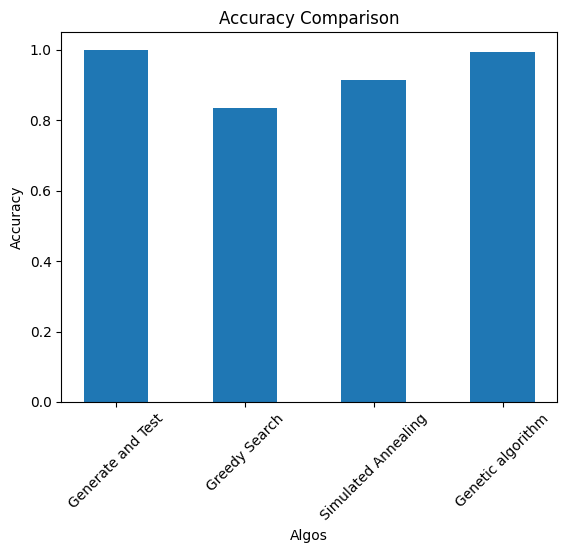

In [ ]:
show_compare_graph()

As we can see here, the four algorithms yield the following accuracies: the generate and test algorithm and the greedy algorithm achieve accuracies of 100% and 83.4%, respectively. Assuming a base value of temp = 1, cooling rate = 0.95 for simulated annealing, resulting in accuracy of 91.4% and population size = 50, num_generations = 50, mutation rate = 0.1, cross rate = 0.7 and tournament size = 5, resulting in 99.3% accuracy for genetic algorithm.


We understand that the brute force solution, while entirely accurate, runs in exponential time. The algorithm will guaranteed to find the optimal solution along with generating all the possible solution. However, it has exponential time complexity. The time needed to solve the knapsack problem escalates exponentially as the quantity of items increases.

In addition, the greedy approach's accuracy of 83.43% which is the lowest accuracy among the algorithms. We understand that while greedy search runs in O(n log n) because we only need to sort the algorithm and perform a single iteration, it is much more prone to risk because it does not consider the capacity of storing the best price to weight items compared to storing multiple items that could result in a higher total price given the capacity of the knapsack. This means that greedy approach does not guaranteed to find the optimal solution in all cases.

Thus, we try to look for a middleground where accuracy can be higher than the greedy algorithm, but for the algorithm itself to still run in polynomial time.

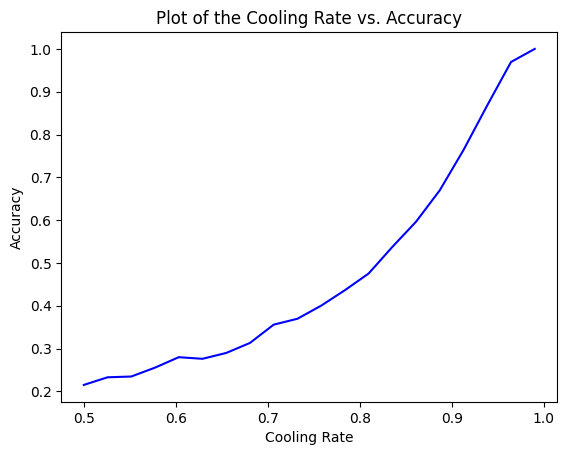

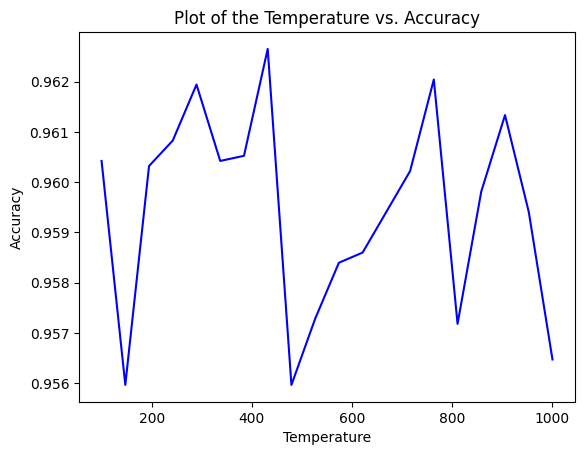

In [ ]:
# note: if the graph did not display correct result, please run the corresponding algorithm
# and the graph function cell again then try to run the graph cell
show_change_in_cooling()
show_change_in_temp()

The first of which, simulated annealing, has an accuracy of 68% to 100% based on the configuration of the different values. Through our previous analysis regarding initial temperature, we understand that it is not a reliable indicator regardless of size because of the accept function's corresponding condition to accept a neighbour solution even when no difference between the current best solution and iterated solution's prices. The number of iterations increased by temperature substantially causes less neighouring solutions to be accepted at the same time, balancing out the differences gained.

However, we do see from the corresponding graph above that a higher cooling rate, which only acts as a directly correlated value to the number of iteration, directly impacts the accuracy. The graph depicting the relationship between the cooling rate and accuracy shows a positive correlation, where an increase in the cooling rate corresponds to an increase in accuracy. A slower cooling allows the algorithm to traverse all the solution space. As the temperature drops, the likelihood of accepting function to accepts worse solutions diminishes, potentially leading to find the global optimal solution.
This observation aligns with how the cooling rate affects the performance and convergence behavior of simulated annealing algorithms.

In comparison, genetic algorithm takes significantly more parameters. However, as detailed in the previous explanation and graphs below, we find that only cross rate and mutation rate have a significant impact to the accuracy of the algorithm. The range of accuracy change resulting from adjustments in the cross rate is quite extensive, spanning from 40% to 99%. In contrast, modifying the generation size yields a much narrower range, with accuracy change limited between 98% and 99%.

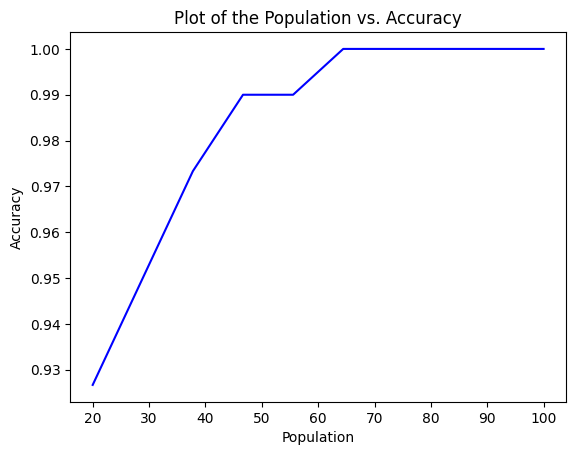

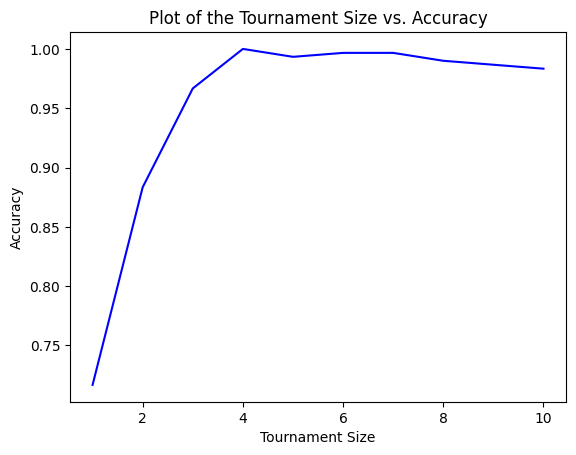

In [ ]:
change_in_population()
change_in_tournament_size()

When the population size is reduced, the algorithm explores a smaller set of solutions in each generation. This can increase the likelihood of getting stuck in local maximum, especially if the diversity of the population is limited. As we increase the population size, the genetic algorithm has a higher probability of finding the optimal solution, leading up an accuracy cost to 1.

On the other hand, it can be seen from the graph when using a low tournament size, typically ranging from 1 to 2, we tend to achieve lower accuracy. This is because there is a higher likelihood of selecting inferior solutions to produce the next generation. As the tournament size increases, our accuracy stabilizes at approximately 95% to 99%.

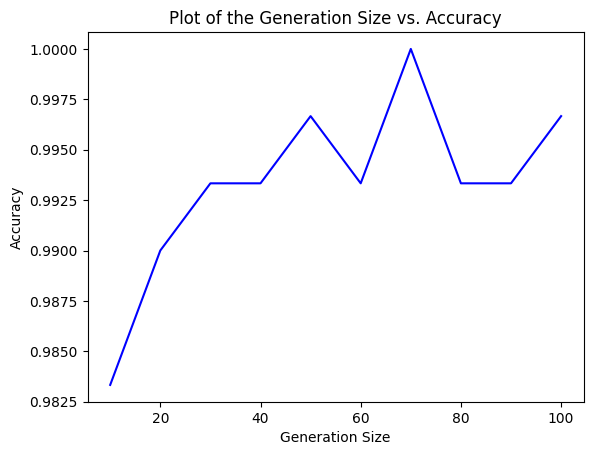

In [ ]:
change_in_generations_size()

The change in generation size has the smallest impact on accuracy results, indicating that it is the least sensitive parameter in the genetic algorithm. This implies that we can still find the optimal solution by adjusting the total number of generations, either increasing or decreasing it, as long as the other parameters are within their optimal ranges for searching for the optimal solution.

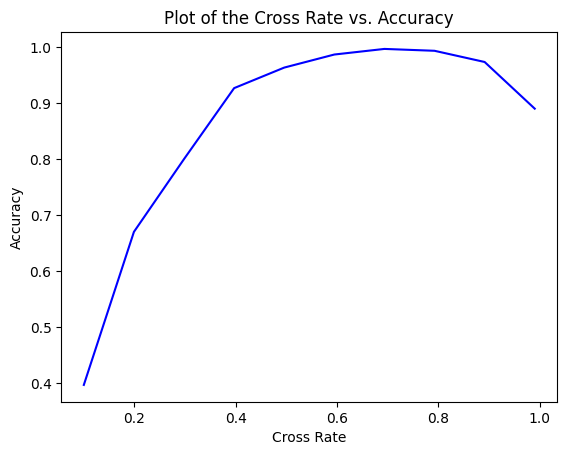

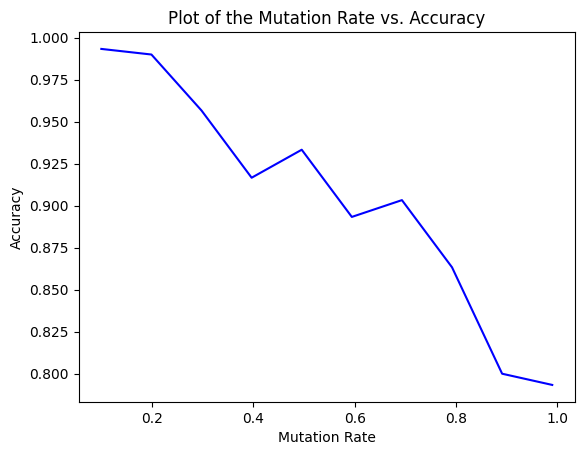

In [ ]:
change_in_cross()
change_in_mutation()

The crossover rate has the most significant impact on accuracy. When the crossover rate is lowered, it can reduce accuracy to as low as 40%, indicating a potential loss in the ability to improved solutions. When the crossover rate is increased to a specified range (60% to 70%), the genetic algorithm is effective at exploring the search space to able find the global optimal solution. However, increasing the crossover rate beyond this specific point may lead to a decrease in accuracy. This means that not all offspring of the parents will inherit favorable genetic traits, increasing the cross rate will likelihood increases the probability of generating inferior solutions in the next generation.

![Hill Climbing Example](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20210726172958/objectfuntion.png)

<footnote><i>Hill Climbing Example, from the graph we can see that if we reach the global maximum state, a neighour solution will cost us getting a downhill solution</i></footnote>

<footnote>Source: <a href="https://www.geeksforgeeks.org/introduction-hill-climbing-artificial-intelligence/">geeksforgeeks</footnote>


The mutation rate, on the other hand, has a negative relationship with accuracy. When the mutation rate increases, accuracy decreases. This happens because mutation generates neighboring solutions of the current solution in the pursuit of an optimal solution. This can significantly increase the likelihood of the algorithm converging towards a downhill solution, which is a solution worse than the optimal one.

We also understand that cross rate has a greater impact than mutation, because mutation only results in a neighour solution where only one of the values in a knapsack solution is caused, whereas crossing two solutions will split the parent solutions in half and merge them together. This means, there is significantly more potential for variance in this solution, leading to larger chances in accuracy.


--------------------------------------------------------------------------


# **9. Conclusion**


From our testing, we have come to understand that is it possible to obtain over 95%+ accuracy despite running an algorithm in polynomial time. Hence, there is no particular reason why we would choose the brute force or greedy solution assuming that N, the number of items in a knapsack solution is relatively small.

When choosing between simulated annealing and genetic algorithm, we see that the accuracy among our range of chosen inputs results in an accuracy level of 68% to 100% for simulated annealing and 89% to 98% for genetic algorithm.

Given the less variance and higher range for genetic algorithm, one may presume that it is preferred over simulated annealing, but that is not necessarily the case.

In the case of simulated annealing, the user only needs to take the cooling rate into consideration. From our results, a cooling rate exceeding 95% will result in an 85% or better accuracy for the algorithm. In comparison, it is more difficult to maintain the genetic algorithm as both the cross rate and mutation rate modify the algorithm. In addition, the runtime, while polynomial will be higher than the simulated annealing because the number of generations and number of popluations are inputs that directly impact the number of iterations that the algorithm performs whereas the simulated annealing only tracks the decrease of the temperature by multiplying it by the cooling rate each iteration. The end result is often several minutes to compile the algorithms again.

Since we understand this, our team suggests using a simulated annealing of at least 95% cooling rate to achieve high accuracy and substantial speed when working with knapsacks.

--------------------------------------------------------------------------


# **10 References**

1. Greedy Algorithm for 0-1 Knapsack: A Data Scientist’s Perspective | Saturn Cloud Blog. (2023, July 18). Saturncloud.io. https://saturncloud.io/blog/greedy-algorithm-for-01-knapsack-a-data-scientists-perspective/#:~:text=The%20Greedy%20Algorithm%20is%20a


2. Simulated annealing. (2023, August 26). In Wikipedia. https://en.wikipedia.org/wiki/Simulated_annealing


3. baeldung. (2023, March 26). Simulated Annealing Explained | Baeldung on Computer Science. Www.baeldung.com. https://www.baeldung.com/cs/simulated-annealing


4. James D. McCaffrey. (2021, December 17). Knapsack Problem Using Simulated Annealing Example. James D. McCaffrey. https://jamesmccaffrey.wordpress.com/2021/12/17/knapsack-problem-using-simulated-annealing-example/


5. Genetic algorithm. (2023, August 27). In Wikipedia. https://en.wikipedia.org/wiki/Genetic_algorithm


6. Dorobek, M. (2020, March 24). Genetic Algorithm. Www.linkedin.com. https://www.linkedin.com/pulse/genetic-algorithm-mateusz-dorobek/


7. Jacobson, L. (2013, August 20). Applying a genetic algorithm to the traveling salesman problem. Www.theprojectspot.com. https://www.theprojectspot.com/tutorial-post/applying-a-genetic-algorithm-to-the-travelling-salesman-problem/5


8. CSI4106-PopulationBased [Lecture]. https://uottawa.brightspace.com/d2l/le/content/392261/viewContent/5543376/View


9. Knapsack problem. (2023, September 18). In Wikipedia. https://en.wikipedia.org/wiki/Knapsack_problem

10. Introduction to Hill Climbing | Artificial Intelligence. (2017, December 12). GeeksforGeeks. https://www.geeksforgeeks.org/introduction-hill-climbing-artificial-intelligence/